
## DAIE Project Part 2: Data Visualization

### 1. Data Visualization 
#### 1.1. Preparing the tools by importing libraries
- (Add code here to import necessary libraries like Matplotlib, pandas, etc.)

In [36]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For enhanced data visualization

#### 1.2. Loading the data
- (Add code here to load the dataset.)


In [37]:
data = pd.read_csv('./data/student-merge(uncleaned).csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,15,U,GT3,A,3,3,other,health,...,4,3,3,1,1,4,10.0,10,10,10
1,GP,F,16,U,LE3,T,2,2,other,at_home,...,4,3,3,2,2,5,14.0,10,11,11
2,MS,F,16,U,GT3,T,1,2,other,services,...,1,3,2,1,2,4,3.0,9,8,8
3,GP,M,17,R,LE3,T,1,1,other,services,...,5,3,5,1,5,5,NaN,8,8,8
4,GP,M,15,U,GT3,T,3,4,services,services,...,5,5,5,3,2,5,0.0,13,13,12


### 1.3. Clean first? Explore First? Visualization first or after cleaning. Up to you.

#### Cleaning methods can be same as Assignment Part 1

In [38]:
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 school                0
sex                   0
age                   0
address             171
famsize               0
Pstatus               0
Medu                  0
Fedu                  0
Mjob                  0
Fjob                  0
reason                0
friendship_scale    967
guardian            172
traveltime            0
studytime             0
failures              0
schoolsup             0
famsup                0
paid                  0
activities            0
nursery               0
higher                0
internet              0
romantic            129
famrel                0
freetime              0
goout                 0
Dalc                  0
Walc                  0
health                0
absences            171
G1                    0
G2                    0
G3                    0
dtype: int64


In [39]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display columns with missing values only
missing_values[missing_values > 0]

address             171
friendship_scale    967
guardian            172
romantic            129
absences            171
dtype: int64

In [40]:
data_cleaned = data.copy()

# Ensure 'absences' column is numeric
data_cleaned['absences'] = pd.to_numeric(data_cleaned['absences'], errors='coerce')

# Impute missing values for numeric columns (e.g., median for 'absences')
data_cleaned['absences'] = data_cleaned['absences'].fillna(data_cleaned['absences'].median())

# Drop rows with missing values in critical categorical columns
data_cleaned = data_cleaned.dropna(subset=['address', 'guardian', 'romantic'])

# Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Verify cleaning steps
missing_after_cleaning = data_cleaned.isnull().sum()
duplicates_after_cleaning = data_cleaned.duplicated().sum()

missing_after_cleaning, duplicates_after_cleaning, data_cleaned.head()


(school                0
 sex                   0
 age                   0
 address               0
 famsize               0
 Pstatus               0
 Medu                  0
 Fedu                  0
 Mjob                  0
 Fjob                  0
 reason                0
 friendship_scale    586
 guardian              0
 traveltime            0
 studytime             0
 failures              0
 schoolsup             0
 famsup                0
 paid                  0
 activities            0
 nursery               0
 higher                0
 internet              0
 romantic              0
 famrel                0
 freetime              0
 goout                 0
 Dalc                  0
 Walc                  0
 health                0
 absences              0
 G1                    0
 G2                    0
 G3                    0
 dtype: int64,
 np.int64(0),
   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
 0     GP   F   15       U     GT3       A 

In [41]:
print(data.info("\nData cleaned successfully.\n"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   school            1074 non-null   object 
 1   sex               1074 non-null   object 
 2   age               1074 non-null   int64  
 3   address           903 non-null    object 
 4   famsize           1074 non-null   object 
 5   Pstatus           1074 non-null   object 
 6   Medu              1074 non-null   int64  
 7   Fedu              1074 non-null   int64  
 8   Mjob              1074 non-null   object 
 9   Fjob              1074 non-null   object 
 10  reason            1074 non-null   object 
 11  friendship_scale  107 non-null    float64
 12  guardian          902 non-null    object 
 13  traveltime        1074 non-null   int64  
 14  studytime         1074 non-null   int64  
 15  failures          1074 non-null   int64  
 16  schoolsup         1074 non-null   object 


In [42]:
# Summary statistics
print(data.describe())


               age         Medu         Fedu  friendship_scale   traveltime  \
count  1074.000000  1074.000000  1074.000000        107.000000  1074.000000   
mean     16.720670     2.601490     2.383613         12.990832     1.528864   
std       1.237877     1.123932     1.100687          6.640340     0.737496   
min      15.000000     0.000000     0.000000          1.320525     1.000000   
25%      16.000000     2.000000     1.000000          7.526053     1.000000   
50%      17.000000     3.000000     2.000000         12.688702     1.000000   
75%      18.000000     4.000000     3.000000         18.701952     2.000000   
max      22.000000     4.000000     4.000000         24.692231     4.000000   

         studytime     failures       famrel     freetime        goout  \
count  1074.000000  1074.000000  1074.000000  1074.000000  1074.000000   
mean      1.971136     0.262570     3.939479     3.209497     3.149907   
std       0.834990     0.656145     0.930515     1.034297     1.15

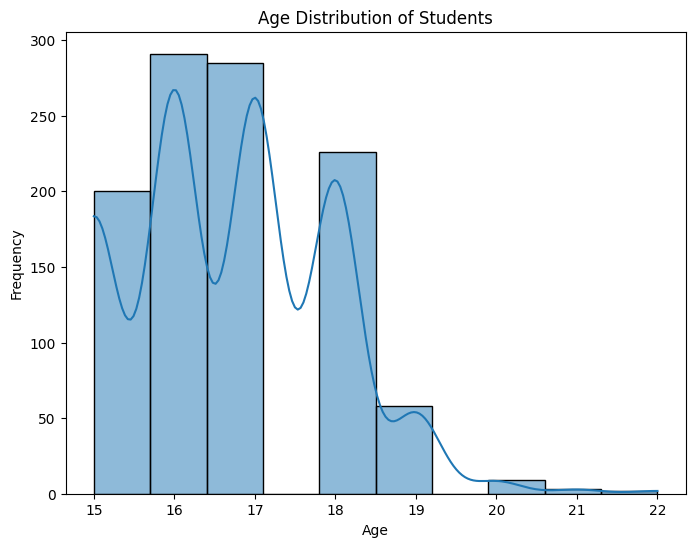

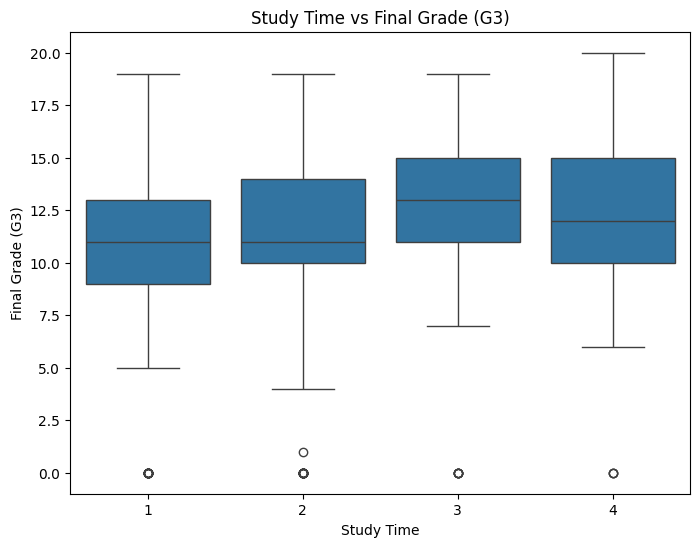

In [43]:

# Visualization of age distribution, which may reveal missing or unusual data
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=10, kde=True)
plt.title("Age Distribution of Students")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Visualization of study time vs. final grade (G3)
plt.figure(figsize=(8, 6))
sns.boxplot(x='studytime', y='G3', data=data)
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study Time")
plt.ylabel("Final Grade (G3)")
plt.show()

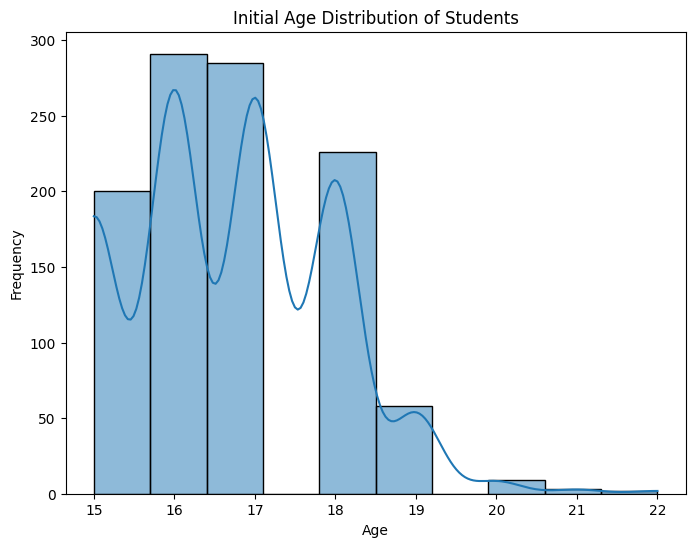

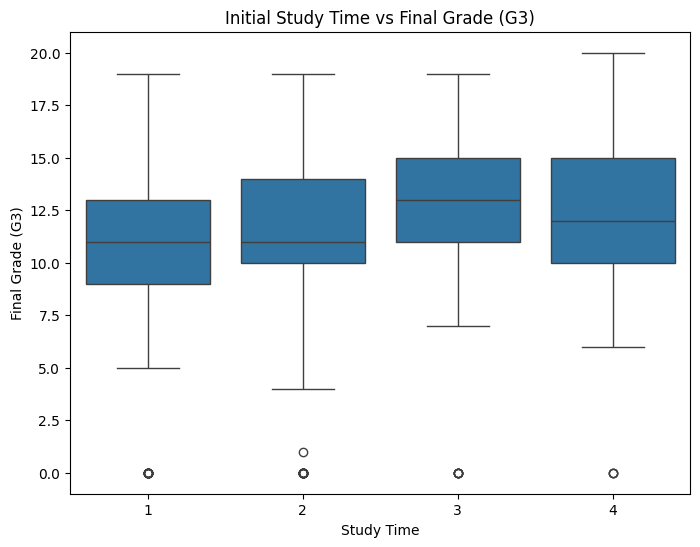

In [44]:
# Visualize age distribution, which may reveal missing or unusual data
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=10, kde=True)
plt.title("Initial Age Distribution of Students")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Visualize study time vs. final grade (G3) to identify outliers or strange values
plt.figure(figsize=(8, 6))
sns.boxplot(x='studytime', y='G3', data=data)
plt.title("Initial Study Time vs Final Grade (G3)")
plt.xlabel("Study Time")
plt.ylabel("Final Grade (G3)")
plt.show()

In [45]:
# Handling missing values, data type corrections, and any outlier treatment based on the visualization findings

# For example:
data = data.dropna(subset=['address', 'guardian'])
data['friendship_scale'] = data['friendship_scale'].fillna(data['friendship_scale'].median())
data['absences'] = data['absences'].fillna(0).astype(int)
data[['G1', 'G2', 'G3']] = data[['G1', 'G2', 'G3']].astype(int)

print("Data cleaning after visualization complete. Current data shape:", data.shape)

Data cleaning after visualization complete. Current data shape: (761, 34)


### Based on the choice of your method, complete the rest of the exploration below

#### 1.4. Data exploration (exploratory data analysis)

#### 1.5. Data Visualization (As many as you can think of for a good story telling of the data)

#### 1.6. Write explanations for each of the data visuals


Data Summary:
        school  sex         age address famsize Pstatus        Medu  \
count     761  761  761.000000     761     761     761  761.000000   
unique      2    2         NaN       2       2       2         NaN   
top        GP    F         NaN       U     GT3       T         NaN   
freq      567  428         NaN     553     547     676         NaN   
mean      NaN  NaN   16.712221     NaN     NaN     NaN    2.654402   
std       NaN  NaN    1.246034     NaN     NaN     NaN    1.119274   
min       NaN  NaN   15.000000     NaN     NaN     NaN    0.000000   
25%       NaN  NaN   16.000000     NaN     NaN     NaN    2.000000   
50%       NaN  NaN   17.000000     NaN     NaN     NaN    3.000000   
75%       NaN  NaN   18.000000     NaN     NaN     NaN    4.000000   
max       NaN  NaN   22.000000     NaN     NaN     NaN    4.000000   

              Fedu   Mjob   Fjob  ...      famrel    freetime       goout  \
count   761.000000    761    761  ...  761.000000  761.000000  761.

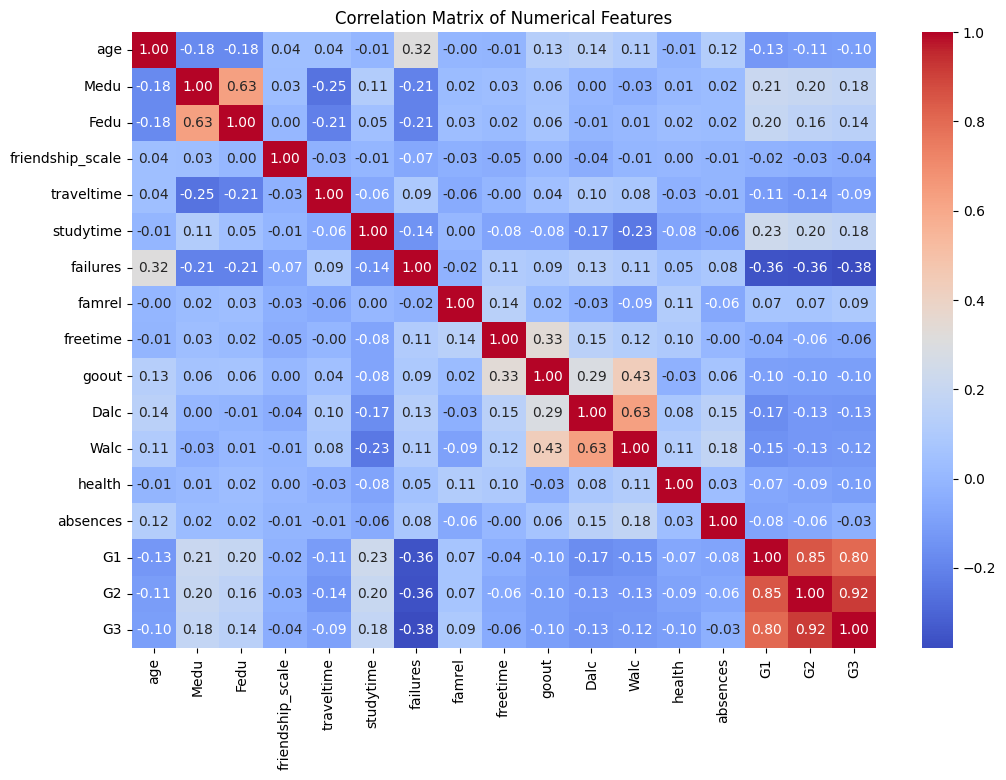

In [46]:
# Check data summary
print("Data Summary:\n", data.describe(include='all'))

# Value counts for categorical columns
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
for col in categorical_columns:
    print(f"\nValue counts for {col}:\n{data[col].value_counts()}")
    
# Select only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Correlation matrix for numerical data
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

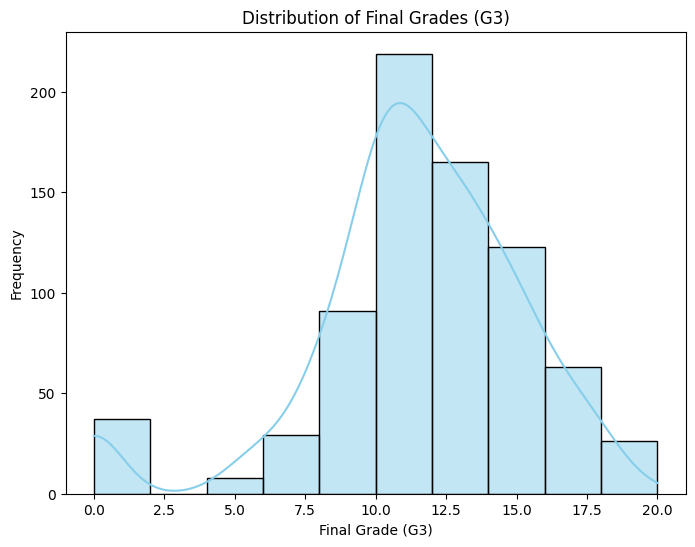

C:\Users\Gerald Lim\AppData\Local\Temp\ipykernel_8812\1652462028.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=data, palette="Set3")


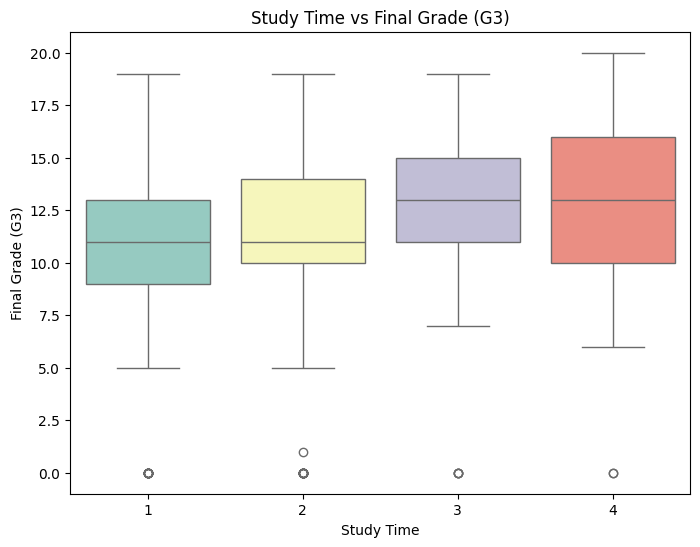

C:\Users\Gerald Lim\AppData\Local\Temp\ipykernel_8812\1652462028.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medu', y='G3', data=data, palette="Set2")


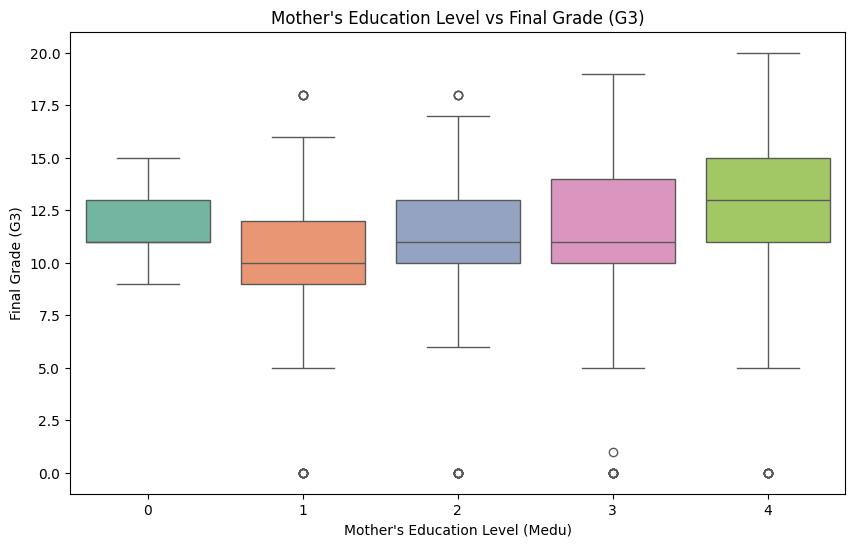

C:\Users\Gerald Lim\AppData\Local\Temp\ipykernel_8812\1652462028.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Walc', y='G3', data=data, palette="coolwarm")


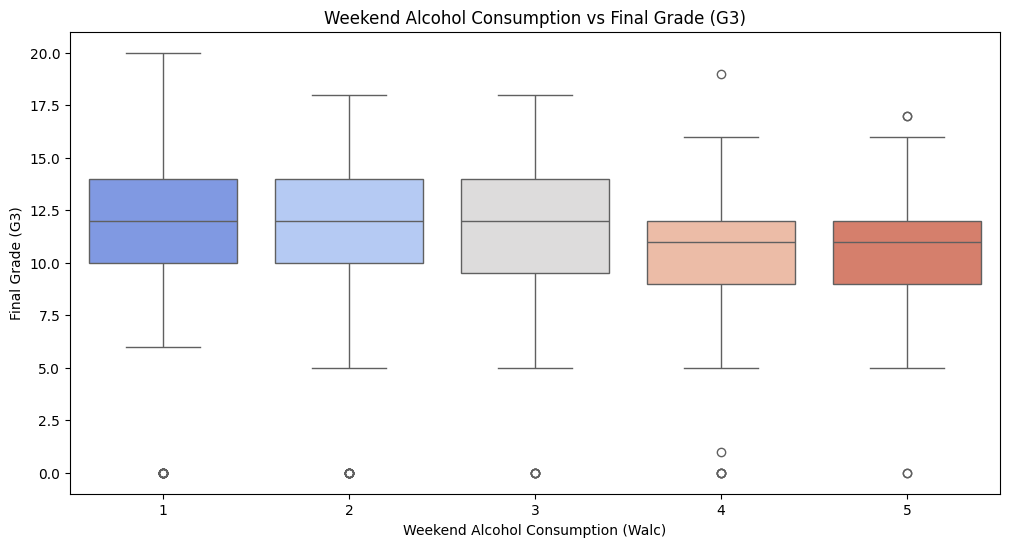

C:\Users\Gerald Lim\AppData\Local\Temp\ipykernel_8812\1652462028.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dalc', y='G3', data=data, palette="coolwarm")


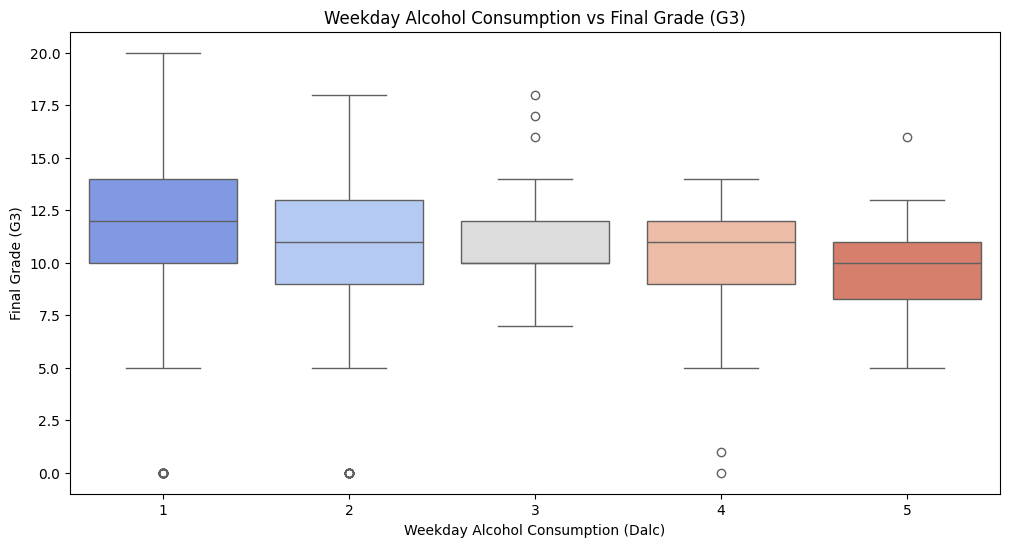

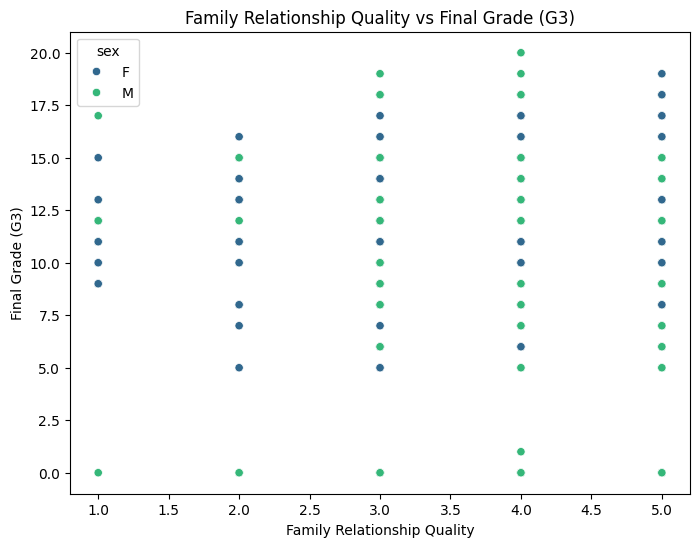

In [47]:
# 1. Distribution of Final Grades (G3)
plt.figure(figsize=(8, 6))
sns.histplot(data['G3'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.show()

# 2. Study Time vs Final Grade (G3)
plt.figure(figsize=(8, 6))
sns.boxplot(x='studytime', y='G3', data=data, palette="Set3")
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study Time")
plt.ylabel("Final Grade (G3)")
plt.show()

# 3. Parental Education Level vs Final Grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medu', y='G3', data=data, palette="Set2")
plt.title("Mother's Education Level vs Final Grade (G3)")
plt.xlabel("Mother's Education Level (Medu)")
plt.ylabel("Final Grade (G3)")
plt.show()

# 4. Alcohol Consumption (Weekday and Weekend) and Academic Performance
plt.figure(figsize=(12, 6))
sns.boxplot(x='Walc', y='G3', data=data, palette="coolwarm")
plt.title("Weekend Alcohol Consumption vs Final Grade (G3)")
plt.xlabel("Weekend Alcohol Consumption (Walc)")
plt.ylabel("Final Grade (G3)")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Dalc', y='G3', data=data, palette="coolwarm")
plt.title("Weekday Alcohol Consumption vs Final Grade (G3)")
plt.xlabel("Weekday Alcohol Consumption (Dalc)")
plt.ylabel("Final Grade (G3)")
plt.show()

# 5. Family Relationship Quality and Final Grade
plt.figure(figsize=(8, 6))
sns.scatterplot(x='famrel', y='G3', data=data, hue='sex', palette="viridis")
plt.title("Family Relationship Quality vs Final Grade (G3)")
plt.xlabel("Family Relationship Quality")
plt.ylabel("Final Grade (G3)")
plt.show()